In [1]:
import numpy as np
from matplotlib import pyplot as plt
from my_utils import *
from sigproc_kit import *

In [2]:
t = np.linspace(0,1e-6,10000) # be sure to make not to few steps, if you have a sharp IR
y = detector_signal_function(t, 100e-12, 5e-9, 30e-9, 10e-9)

![image](images/PZ_ZP.png)

$$ W_{PZ}(s) = \frac{s+1/\tau_1}{s+1/\tau_2} $$
$$ \tau_1 = R_1 C \quad \tau_2 = \frac{R_1 R_2}{R_1 + R_2}C \quad \tau_1 > \tau_2 $$
$$ --- $$
$$ W_{ZP}(s) = \frac{\tau_1}{\tau_2} \frac{s+1/\tau_1}{s+1/\tau_2} $$
$$ \tau_1 = R_2 C \quad \tau_2 = (R_1 + R_2)C \quad \tau_1 < \tau_2 $$
***
- delta response of the pole-zero filter
$$ w_{PZ}(t) = \mathcal{L}^{-1}\left[W_{PZ}(s)\right] = \delta(t) - \frac{\tau_1 - \tau_2}{\tau_1 \tau_2} e^{-t/\tau_2} \Theta (t) $$

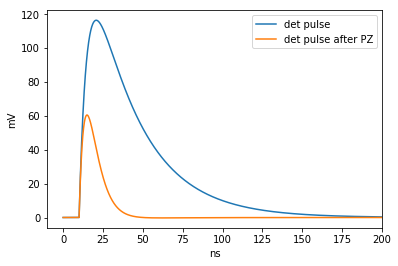

In [3]:
##################################################
##            PZ function with taus             ##
##################################################

tau1 = 30e-9
tau2 = 5e-9

yPZ = PZ_filter(t,y,tau1=tau1,tau2=tau2)

plt.plot(t*1e9,y*1e3,label="det pulse")
plt.plot(t*1e9,yPZ*1e3,label="det pulse after PZ")
plt.xlim(-10,200)
plt.xlabel("ns")
plt.ylabel("mV")
plt.legend()
plt.show()

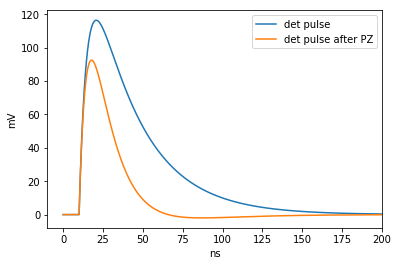

In [4]:
##################################################
##          PZ function with R1,R2,C            ##
##################################################


yPZ = PZ_filter(t,y,C=0.5e-9,R1=80,R2=50)

plt.plot(t*1e9,y*1e3,label="det pulse")
plt.plot(t*1e9,yPZ*1e3,label="det pulse after PZ")
plt.xlim(-10,200)
plt.xlabel("ns")
plt.ylabel("mV")
plt.legend()
plt.show()

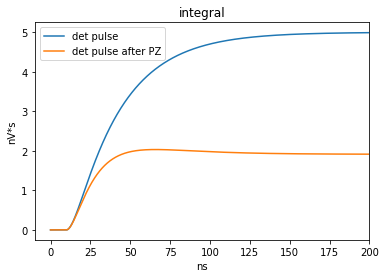

In [5]:

plt.plot(t*1e9,integrate_dt(t,  y)*1e9,label="det pulse")
plt.plot(t*1e9,integrate_dt(t,yPZ)*1e9,label="det pulse after PZ")
plt.xlim(-10,200)
plt.xlabel("ns")
plt.ylabel("nV*s")
plt.title("integral")
plt.legend()
plt.show()

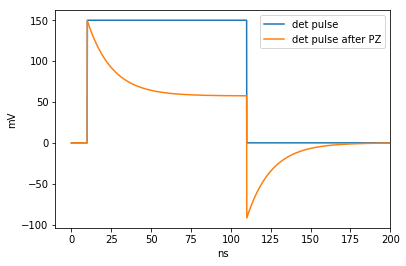

In [6]:
y = square_pulse(t,on_val=150e-3, width=100e-9,delay=10e-9)

R = 1e3
C = 10e-12

yPZ = PZ_filter(t,y,C=0.5e-9,R1=80,R2=50)

plt.plot(t*1e9,y*1e3,label="det pulse")
plt.plot(t*1e9,yPZ*1e3,label="det pulse after PZ")
plt.xlim(-10,200)
plt.xlabel("ns")
plt.ylabel("mV")
plt.legend()
plt.show()

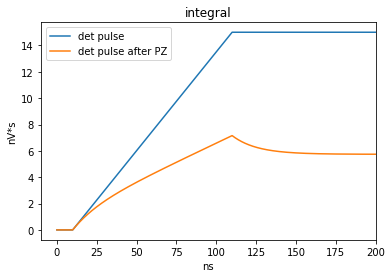

In [7]:

plt.plot(t*1e9,integrate_dt(t,  y)*1e9,label="det pulse")
plt.plot(t*1e9,integrate_dt(t,yPZ)*1e9,label="det pulse after PZ")
plt.xlim(-10,200)
plt.xlabel("ns")
plt.ylabel("nV*s")
plt.title("integral")
plt.legend()
plt.show()